In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [2]:
url = 'https://statlearning.com/s/Advertising.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


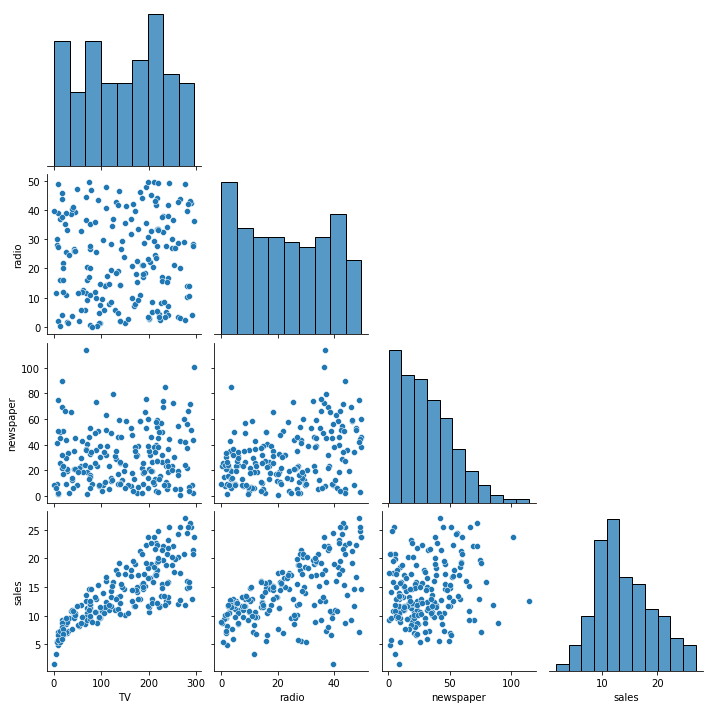

In [7]:
sns.pairplot(df, corner=True)

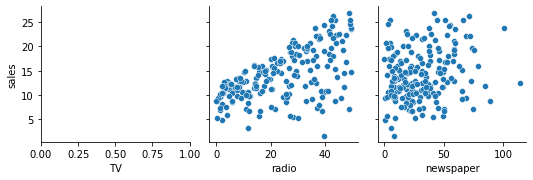

In [5]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'])

In [8]:
y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [54]:
df['foo'] = df['newspaper'] + 10
df

,TV,radio,newspaper,sales,foo
0,230.1,37.8,69.2,22.1,79.2
1,44.5,39.3,45.1,10.4,55.1
2,17.2,45.9,69.3,9.3,79.3
3,151.5,41.3,58.5,18.5,68.5
4,180.8,10.8,58.4,12.9,68.4
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,23.8
196,94.2,4.9,8.1,9.7,18.1
197,177.0,9.3,6.4,12.8,16.4
198,283.6,42.0,66.2,25.5,76.2


In [55]:
df.corr()

,TV,radio,newspaper,sales,foo
TV,1.000000,0.054809,0.056648,0.782224,0.056648
radio,0.054809,1.000000,0.354104,0.576223,0.354104
newspaper,0.056648,0.354104,1.000000,0.228299,1.000000
sales,0.782224,0.576223,0.228299,1.000000,0.228299
foo,0.056648,0.354104,1.000000,0.228299,1.000000


In [13]:
features = ['TV', 'radio', 'newspaper']

X = df[features]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression()

In [17]:
model.intercept_

2.9388893694594085

In [19]:
features

['TV', 'radio', 'newspaper']

In [20]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

    B0      B1          B2              B3
y = 2.938 + 0.045 * TV + 0.18 * radio - 0.001 * newspaper

<AxesSubplot:>

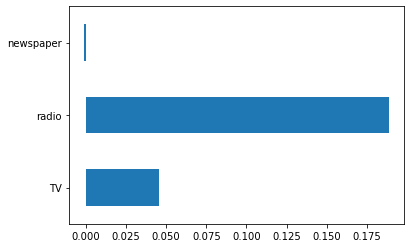

In [27]:
coefs = pd.Series(model.coef_, index=features)
coefs.plot.barh()

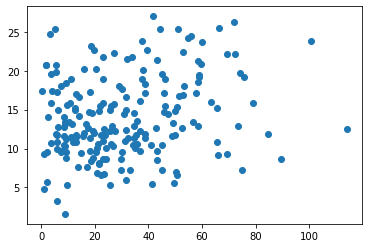

In [25]:
plt.scatter(df['newspaper'], df['sales'])

In [29]:
# Get predictions from our model
pred = model.predict(X)

In [33]:
# Residuals, 
# negative = model overshot the target
# positive = model underpredicted the targe
residuals = y - pred
residuals

0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Name: sales, Length: 200, dtype: float64

In [40]:
((y - y) ** 2).sum()

0.0

In [41]:
sse = (residuals ** 2).sum()

In [45]:
# SSE is not a metric in and of itself. Gets larger the more predictions you make
((y[:5] - model.predict(X)[:5]) ** 2).sum()

16.18246451983278

In [47]:
# Mean Squared error (MSE) of our model
1 / len(y) * sse

2.7841263145109365

In [48]:
y.var()

27.221853015075364

<AxesSubplot:>

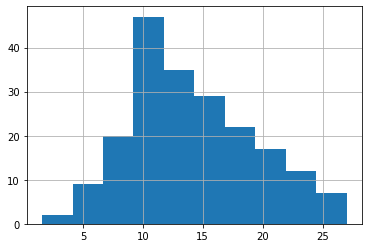

In [49]:
y.hist()

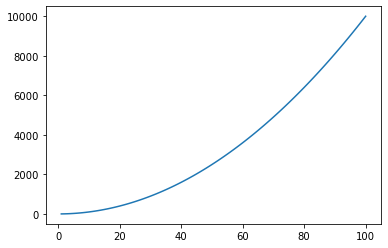

In [36]:
numbers = np.arange(1, 101)
plt.plot(numbers, numbers ** 2)

<AxesSubplot:>

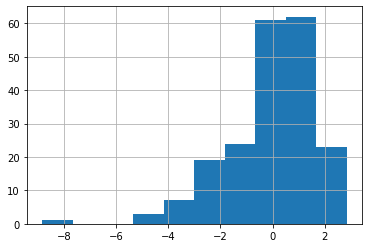

In [51]:
# N: Normal Dist'n of Residuals
residuals.hist()

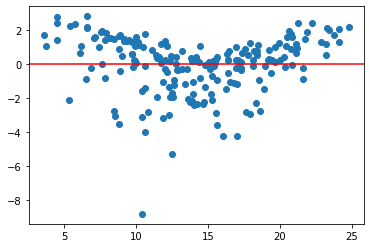

In [53]:
# E: Equal Variance of Residuals
plt.axhline(0, color='r')
plt.scatter(pred, residuals)